In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [39]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
dataframe = pd.read_csv(url, sep='\t')

In [40]:
dataframe.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 1. Вывести: кол-во наблюдений в датасете

In [4]:
dataframe.shape[0]

4622

#### 2. Вывести названия столбцов

In [35]:
list(dataframe.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### 3. Определить самую частую позицию (item) в заказе 

In [18]:
dataframe['item_name'].mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item)

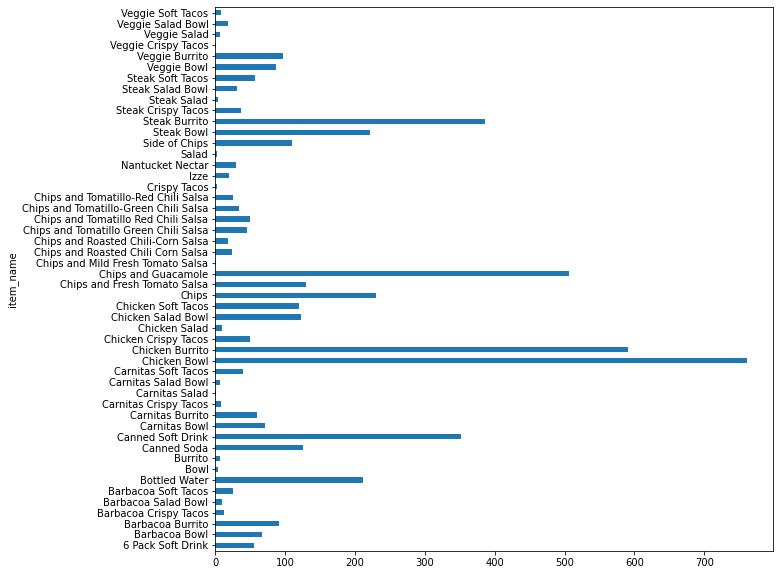

In [30]:
dataframe.groupby('item_name')['quantity'].sum().plot(kind='barh', figsize=(10,10))
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [41]:
dataframe['item_price'] = dataframe['item_price'].apply(lambda x: float(x[1:]))
dataframe.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

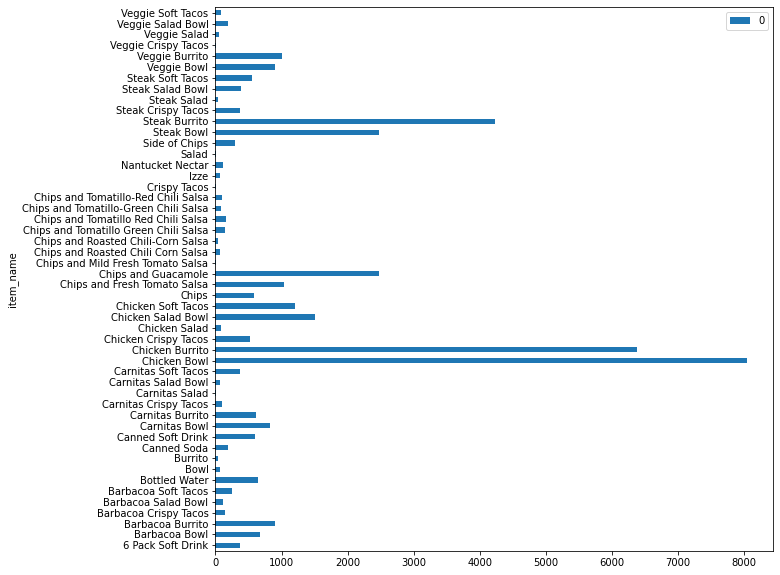

In [93]:
pd.concat([dataframe['item_name'], dataframe['quantity'] * dataframe['item_price']], axis=1).groupby('item_name').sum().plot(kind='barh', figsize=(10,10))
plt.show()

# {key: (dataframe['quantity'] * dataframe['item_price'])[value].sum() 
#     for key, value in dataframe.groupby('item_name').indices.items()}

#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### [Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.